## P-Pdot Diagram with all pulsar classes and death lines and valley. LPTs are included.

In [1]:
%matplotlib inline
import matplotlib 
import matplotlib
params = {
    'savefig.dpi': 300, 
    'xtick.direction': 'in',
    'ytick.direction': 'in',
    'font.size': 20, 
    'text.usetex': False,
    "font.family": "Arial",
}
matplotlib.rcParams.update(params)

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import rc, rcParams
import adjustText
import os
import math
import numpy as np
from scipy import constants
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap
from matplotlib import colors
import scipy
import scipy.constants as sc
import astropy
import astropy.constants as astro_cons
import cmasher as cmr

### Unit conversions and data upload

In [2]:
electron_mass_cgs = astro_cons.m_e.cgs.value
electron_charge_cgs = astro_cons.e.gauss.value
solar_mass_cgs = astro_cons.M_sun.cgs.value
planck_bar_cgs = astro_cons.hbar.cgs.value
light_c_cgs = astro_cons.c.cgs.value

In [3]:
df_sources_data = pd.read_csv('PPdotB_LumkTage_allclasses_130126.csv')
df_sources_data

,source,class,radio,association,distance(kpc),l(deg),b(deg),period(s),pdot(1e-11s/s),pdot_ul,...,Err_kT_min,kT_min_ul,lumin_peak,kT_max,Err_kT_max,kT_max_ul,Err_lum_down(1e33erg/s),Err_lum_up(1e33erg/s),Err_tau_real_down(kyr),Err_tau_real_up(kyr)
0,CXOUJ185238.6+0040,CCO,NaN,SNR Kes79,7.100,33.667347,0.038728,0.105,8.700000e-07,NaN,...,0.001,NaN,NaN,NaN,NaN,NaN,0.42,0.42,1.20,1.20
1,1E1207.4-5209,CCO,NaN,SNR G296.5+10.0,2.350,296.545164,9.916088,0.424,2.200000e-06,NaN,...,0.100,NaN,NaN,NaN,NaN,NaN,4.98,2.27,2.30,2.30
2,RXJ0822.0-4300,CCO,NaN,SNR PuppisA,1.300,260.572541,-3.495317,0.113,9.300000e-07,NaN,...,0.050,NaN,NaN,NaN,NaN,NaN,1.00,1.00,0.50,0.50
3,1E161348-5055,CCO,NaN,SNR RCW103,3.300,332.428951,-0.373763,24030.000,7.000000e+01,True,...,0.100,NaN,220.0,1.2,0.1,NaN,1.00,1.00,1.80,1.80
4,CXOJ085201.4-461753,CCO,NaN,SNR Vela Jr,0.770,266.234600,-1.194200,NaN,NaN,NaN,...,0.010,NaN,NaN,NaN,NaN,NaN,0.06,0.06,1.25,1.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,GLEAM-XJ0704-36,WDLPT,True,NaN,NaN,247.895543,-13.635260,10496.500,3.900000e+00,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,ARSco,WDpulsar,True,NaN,0.116,353.520000,18.710000,117.100,6.800000e-02,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
87,J1912-4410,WDpulsar,True,NaN,0.237,353.343256,-22.061363,319.300,6.000000e-01,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
88,ILTJ1101+5521,WDLPT,True,NaN,0.504,150.455121,55.519993,7531.780,1.710000e+00,True,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_atnf_data = pd.read_csv('ATNF_catalog_Pgr0.01_25062021.csv', delimiter=';')
df_atnf_data

,NAME,PSRJ,P0,P1,BINARY,PB,DIST,ASSOC,AGE,BSURF,EDOT
2474,J1847-0130,J1847-0130,6.707046,1.270000e-12,*,*,5.801,*,8.330000e+04,9.360000e+13,1.670000e+32
2408,J1718-3718,J1718-3718,3.378574,1.610000e-12,*,*,3.918,*,3.320000e+04,7.470000e+13,1.650000e+33
2434,J1814-1744,J1814-1744,3.975905,7.450000e-13,*,*,5.037,*,8.460000e+04,5.510000e+13,4.680000e+32
1907,J1734-3333,J1734-3333,1.169341,2.280000e-12,*,*,4.461,*,8.130000e+03,5.220000e+13,5.630000e+34
2438,J1819-1458,J1819-1458,4.263213,5.630000e-13,*,*,3.301,XRS:CXOU_J181939.1-145804[mrg+07],1.200000e+05,4.960000e+13,2.870000e+32
...,...,...,...,...,...,...,...,...,...,...,...
78,J1434+7257,J1434+7257,0.041741,5.500000e-19,*,*,0.974,*,1.200000e+09,4.850000e+09,2.990000e+32
94,J0609+2130,J0609+2130,0.055698,2.350000e-19,*,*,0.574,*,3.760000e+09,3.660000e+09,5.370000e+31
112,J1729-2117,J1729-2117,0.066293,1.720000e-19,*,*,0.974,*,6.110000e+09,3.420000e+09,2.330000e+31
98,J2235+1506,J2235+1506,0.059767,1.580000e-19,*,*,1.54,*,6.010000e+09,3.110000e+09,2.910000e+31


In [5]:
df_sources_data.to_csv('PPdotB_LumkTage_allclasses_130126.csv', index=False)

### DEATH LINES

In [6]:
def first_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/4)*(106.37 - 9.5*np.log10(R) + 7.5*np.log10(P))

In [7]:
def second_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/4)*(96.692 - 8.5*np.log10(R) + 6.5*np.log10(P))

In [8]:
def third_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/7)*(180.078 - 17*np.log10(R) + 13*np.log10(P))

In [9]:
def fourth_dl_chen(P,R,M):
    R = np.ones(len(P))*R
    return (1/4)*(91.85 - 8*np.log10(R) + 6*np.log10(P))

In [10]:
def third_dl_zhang_Pdot(P,R,M):
    R = np.ones(len(P))*R
    M = np.ones(len(P))*M
    return 21.32 - np.log10(M) + (5/2)*np.log10(P) - (1/2)*np.log10(R)

In [11]:
def third_prime_dl_zhang_Pdot(P,R,M):
    R = np.ones(len(P))*R
    M = np.ones(len(P))*M
    return 16.47 - np.log10(M) + 2*np.log10(P)

### Setting EoS parameters: NS mass and radii (adaptable to WD)

In [14]:
# Characteristic neutron star radius in [cm].
NS_radius = 1.1e6 #7.e8
# Characteristic neutron star mass in solar masses.
NS_mass = 1.4 * astro_cons.M_sun.cgs.value

# Dimensionless coefficients k_0, k_1, k_2 for a force-free magnetosphere
# taken from Spitkovsky (2006) and Philippov et al. (2014).
# For comparison, in vacuum k_0 = 0 and k_1 = k_2 = 2/3.
k_coefficients = [1.0, 1.0, 1.0]

# Canonical neutron star moment of inertia in [g cm^2] assuming a perfect solid sphere.
NS_inertia = 2.0 / 5.0 * NS_mass * NS_radius ** 2

# Auxiliary quantity beta as defined in eq. (72) of Pons & Vigano (2019).
beta = 1./4. * NS_radius ** 6 / (NS_inertia * astro_cons.c.cgs.value** 3)
#beta = np.pi ** 2 * NS_radius ** 6 / (NS_inertia * const.c ** 3)
print(beta)

# Assume an inclination angle in [rad].
chi = 0.

beta_1 = beta * (k_coefficients[0] + k_coefficients[1] * np.sin(chi) ** 2)
print(beta_1)


1.2199855960913578e-41
1.2199855960913578e-41


### Isolated pulsar timing basic parameters

In [16]:
def period_derivative_B(P: float, B: float) -> float:
    """
    This function determines the change in the rotation period of a pulsar. It is taken
    from eq. (70) of Pons & Vigano (2019). For more details see, e.g., Spitkovsky (2006)
    or Philippov et al. (2014), who determine the coefficients k_0, k_1, k_2 (defined in
    the configuration file) for a pulsar embedded in a force-free and resistive magnetosphere
    from numerical simulations. Note that all three input parameters are time-dependent.

    Args:
        P (float): spin period of a simulated pulsar, measured in [s].
        B (float): value of the dipolar component of the magnetic field at the
        magnetic pole for a simulated neutron star, measured in [G].      

    Returns:
        (float): period derivative of a simulated pulsar in [s/s].
    """

    # Period derivative.
    P_deriv = 4 * np.pi**2 * beta_1 * B ** 2 / P

    return P_deriv

def period_derivative_tage(P: float, tage: float) -> float:
    """
    Pdot as a function of period with varying pulsar age assuming P >> P0 and constant magnetic field.
    
    Args:
        P (float): spin period of a simulated pulsar, measured in [s].
        tage (float): characteristic age in [yr].      

    Returns:
        (float): period derivative of a simulated pulsar in [s/s].
    """
    tage = tage * 3600 * 24 * 365
    
    P_deriv = P/(2.*tage)
    
    return P_deriv

def B_from_timing(P: float, Pdot: float) -> float:
    """
    B field estimated from timing properties. 
    Args:
        P (float): spin period of a simulated pulsar, measured in [s].
        Pdot (float): period derivative of a simulated pulsar in [s/s].   

    Returns:
        (float): value of the dipolar component of the magnetic field at the
        magnetic pole for a simulated neutron star, measured in [G].
    """

    # Period derivative.
    B = np.sqrt(P * Pdot / (4 * np.pi**2 * beta_1))

    return B

def tage_from_timing(P: float, Pdot: float) -> float:
    """
    Pulsar characteristic age from timing properties assuming P >> P0 and constant magnetic field. 
    
    Args:
        P (float): spin period of a simulated pulsar, measured in [s].
        Pdot (float): period derivative of a simulated pulsar in [s/s].   

    Returns:
        (float): characteristic age in [yr].     
    """

    # Period derivative.
    tage = P / (2 * Pdot) / (3600 * 24 * 365)

    return tage

def Edot_from_timing(P: float, Pdot: float) -> float:
    """
    Pulsar rotational power from timing properties. 
    
    Args:
        P (float): spin period of a simulated pulsar, measured in [s].
        Pdot (float): period derivative of a simulated pulsar in [s/s].   

    Returns:
        (float): rotational power [erg/s].     
    """

    # Period derivative.
    Edot = 4 * np.pi**2 * NS_inertia * Pdot / P**3
    
    return Edot

### Set-up the grid range

In [17]:
P_min = 0.01
P_max = 99000
Pdot_min = 3.001e-9
Pdot_max = 100000

log_P_edges = np.linspace(np.log10(P_min), np.log10(P_max), 51)
log_P_centers = 0.5 * (log_P_edges[1:] + log_P_edges[:-1])
P_edges = 10**log_P_edges
P_centers = 10**log_P_centers

log_Pdot_edges = np.linspace(np.log10(Pdot_min), np.log10(Pdot_max), 51)
log_Pdot_centers = 0.5 * (log_Pdot_edges[1:] + log_Pdot_edges[:-1])
Pdot_edges = 10**log_Pdot_edges
Pdot_centers = 10**log_Pdot_centers

P_grid, Pdot_grid = np.meshgrid(P_centers, Pdot_centers, indexing='ij')

B_timing = B_from_timing(P_grid, Pdot_grid)
tage_timing = tage_from_timing(P_grid, Pdot_grid)
Edot_timing = Edot_from_timing(P_grid, Pdot_grid)


### P-Pdot plot with all sources and lines

/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_44393/2527022985.py:132: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(x=df_sources_data[selection]['period(s)'],
/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_44393/2527022985.py:161: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(x=df_sources_data[selection]['period(s)'],
/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_44393/2527022985.py:186: UserWarning: No data for colormapping provided via 'c'. Parameters 'norm' will be ignored
  plt.scatter(x=df_sources_data[selection]['period(s)'],
/var/folders/13/n61q0yns78d3rfbjlm7bvq3h0000gn/T/ipykernel_44393/2527022985.py:403: MatplotlibDeprecationWarning: The legendHandles attribute was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use legend_handles instead.
  for h in leg.legendHandles:


--- [START] Adjusting text ---
--- [FINISH] Adjusting text ---


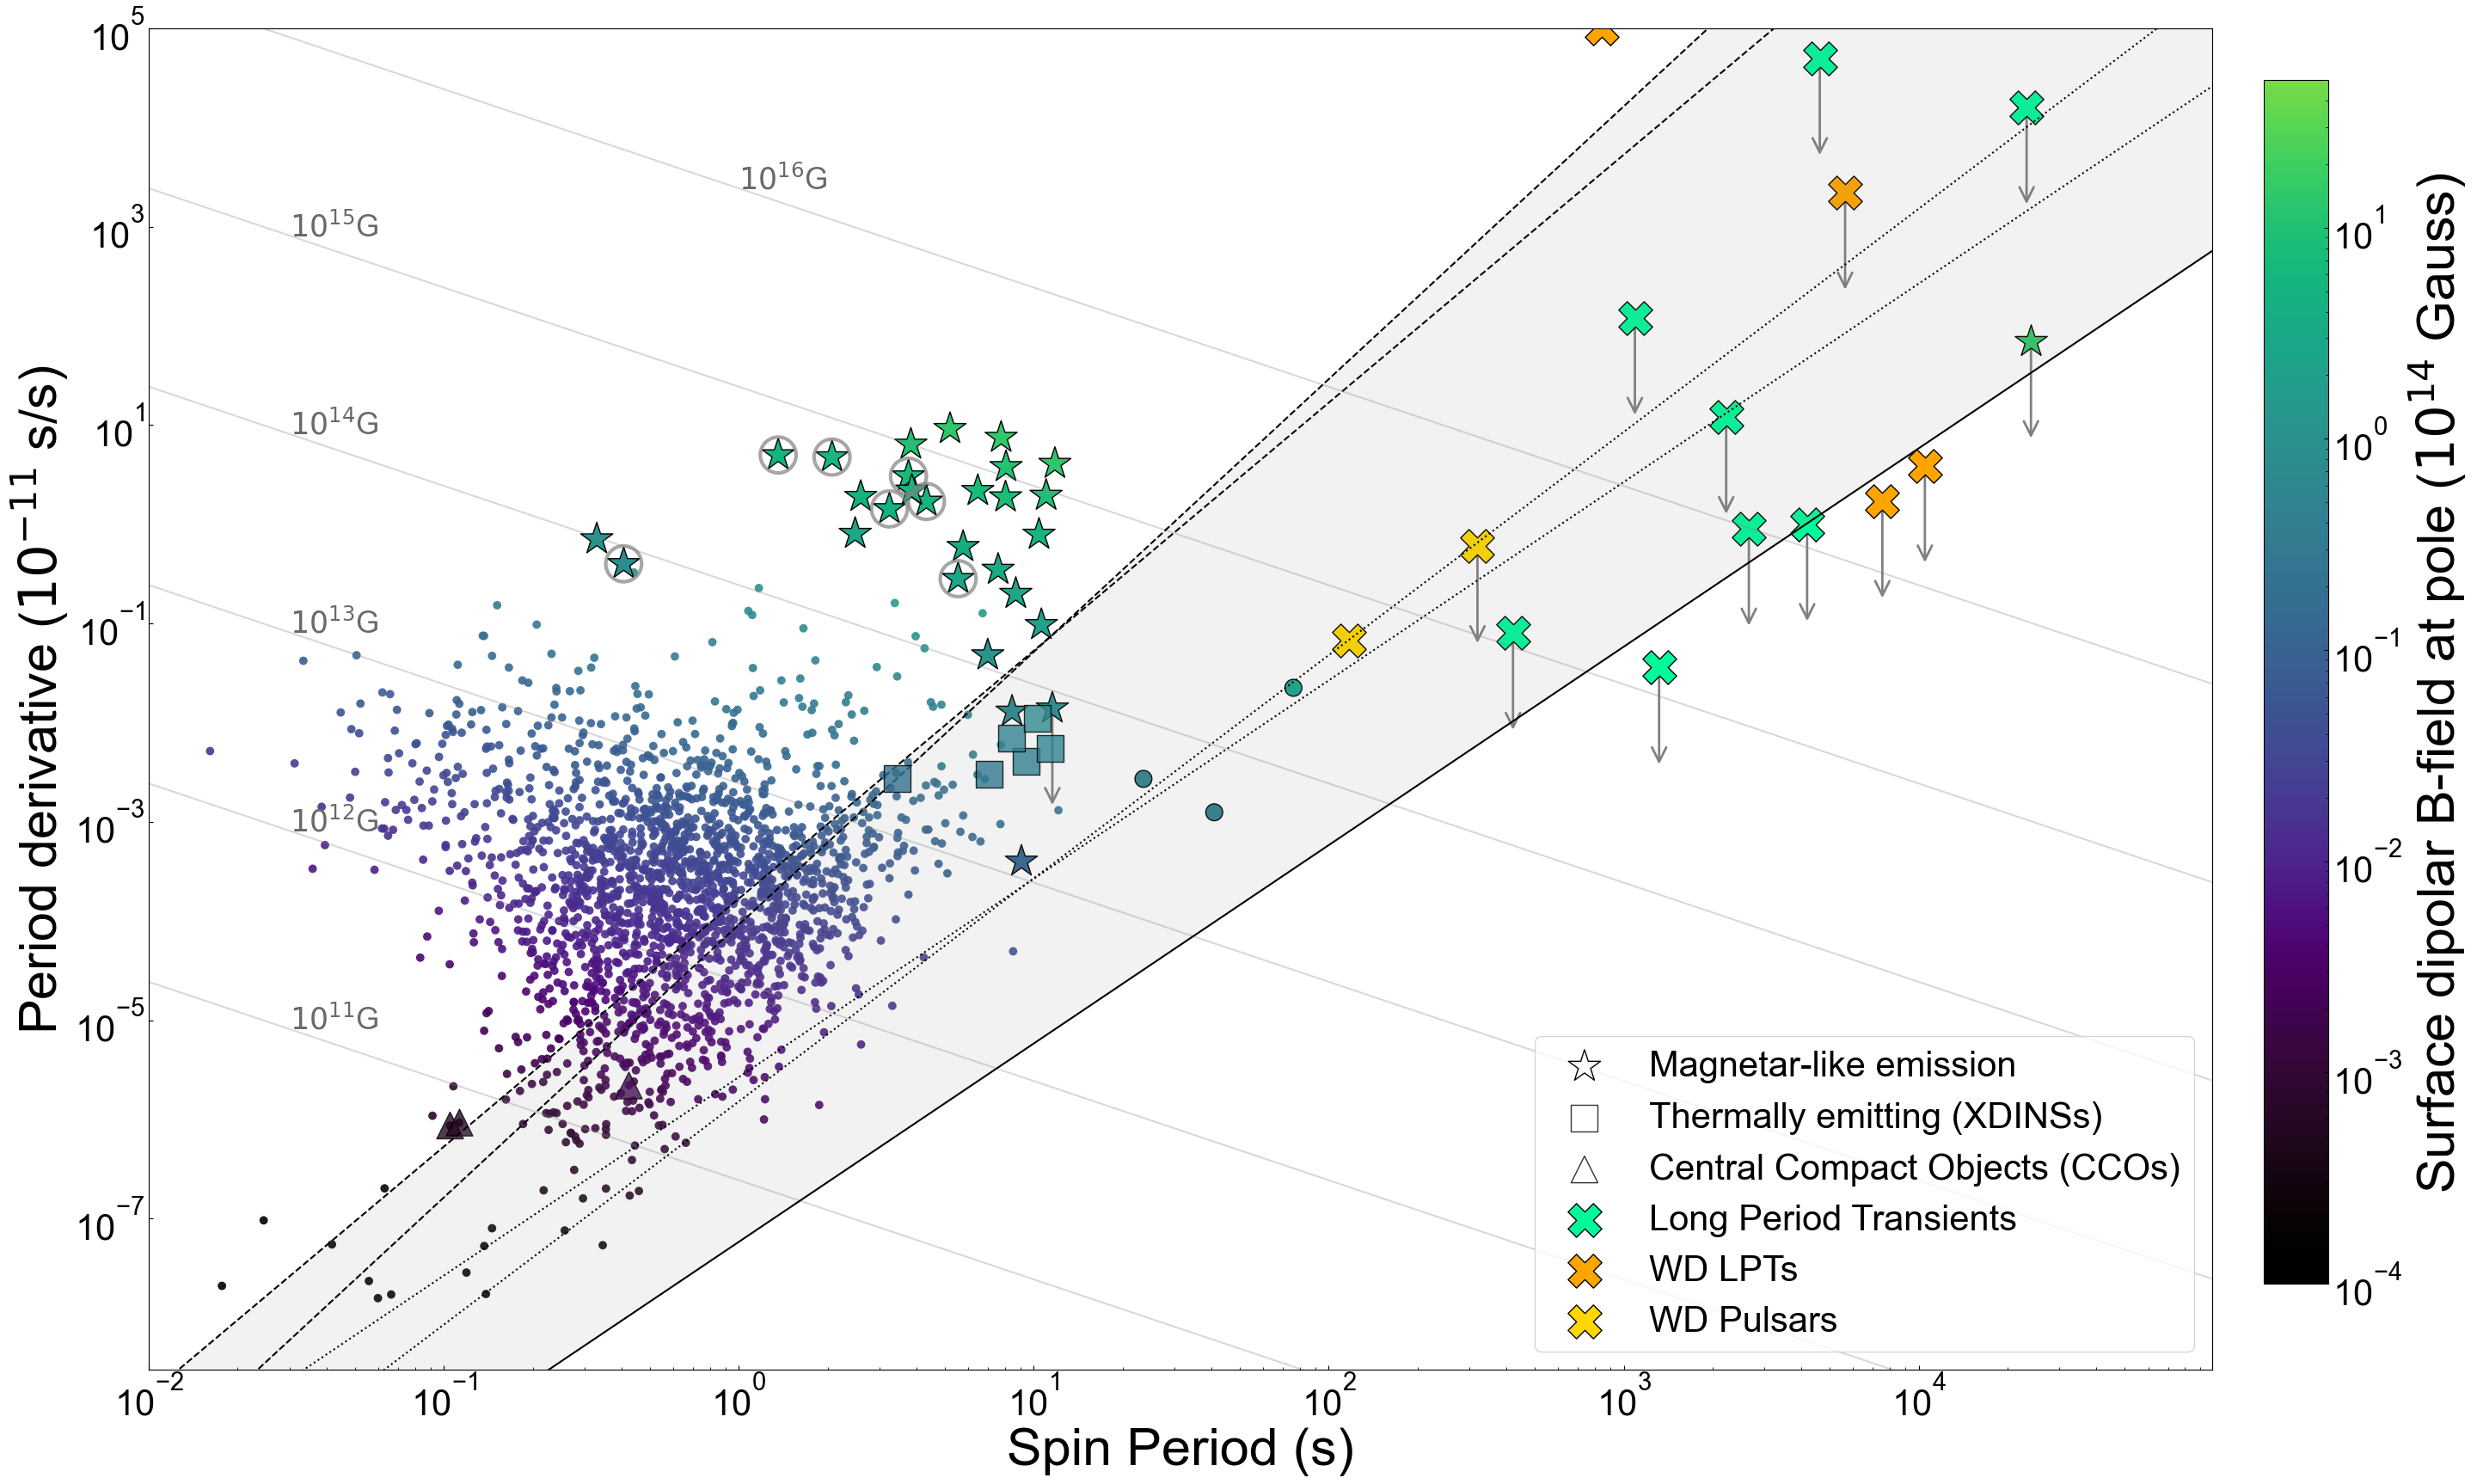

In [18]:
# Colorp MAP source data with P Pdot and DEATH VALLEY

plt.rcParams.update({'font.size': 30})
plt.rcParams['figure.figsize'] = (30,20)

from adjustText import adjust_text

#my_cmap = "hot_r"
#my_cmap = cmr.cosmic
my_cmap = cmr.lavender
texts = []
inside_text_size = 32

# Create the figure and arrange a grid |temp|temp|ppdot|luminosity|.
fig = plt.figure(figsize=(30, 20))
plt.subplots_adjust(left=0.1, bottom=0.1, right=None, top=None, wspace=0.4, hspace=0.4)
fig.subplots_adjust(hspace=0.1, wspace=0.2)
spec_ = matplotlib.gridspec.GridSpec(ncols=1, nrows=1, figure=fig)
ax_ = fig.add_subplot(spec_[0, 0])

ax_.set_xscale('log')
ax_.set_yscale('log')
ax_.set_xlim([0.01, 99000])
ax_.set_ylim([3.001e-9, 100000])
ax_.set_ylabel(r'Period derivative ($10^{-11}$ s/s)', size=44)
ax_.set_xlabel(r'Spin Period (s)', size=44)
ax_.grid(False)

my_norm = matplotlib.colors.LogNorm(0.0001, 50)


# --------  Magnetars 
selection = (df_sources_data['class']=='Magnetar') 
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap,
            norm=my_norm,
            alpha=1, 
            marker='*',
            edgecolors='black',
            s=800,
            label='Magnetar-like emission')

for index, row in df_sources_data[selection].iterrows():
 
    # Plot radio magnetars
    if row['radio']==True:
        plt.scatter(row['period(s)'], row['pdot(1e-11s/s)'], 
                    s=900, facecolors='none', edgecolors='grey', linewidths=3, alpha=0.7)
                        
              
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)
        

  
## -------- XDINS 
selection = (df_sources_data['class']=='XDINS')
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
             marker='s',
            edgecolors='black',
             s=500,
             alpha=0.8, zorder=3,
             label='Thermally emitting (XDINSs)')

plt.clim(0.0001, 50)


## -------- CCOs
selection = ((df_sources_data['class']=='CCO') & (~np.isnan(df_sources_data['Edot(e33erg/s)'])))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=0.8, 
            marker='^',
            edgecolors='black',
            s=500,
            #color='grey',
            label='Central Compact Objects (CCOs)')

plt.clim(0.0001, 50)


## -------- LongP normal pulsars
selection = ((df_sources_data['source']=='PSRJ0250+5854') | (df_sources_data['source']=='PSRJ0901-4046') | (df_sources_data['source']=='PSRJ0311+1402'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='o',
            edgecolors='black',
            s=200,
            #label='Long Period Transients'
           )

plt.clim(0.0001, 50)


## -------- RCW103 - long period magnetar
selection = ((df_sources_data['source']=='1E161348-5055'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='*',
            edgecolors='black',
            s=800
            #color='grey',
            )

for index, row in df_sources_data[selection].iterrows():

 
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)   
        
        
## -------- LPTs
selection = ((df_sources_data['class']=='LPT'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='X',
            edgecolors='black',
            s=800,
            color='mediumspringgreen', 
            label='Long Period Transients'
           )

for index, row in df_sources_data[selection].iterrows():
   
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
 

        
## --------  WD LPTs

#selection = (
#    (df_sources_data['class'] == 'WDLPT') &
#    (df_sources_data['source'] != 'CHIMEJ1634+44')
#)
selection = ((df_sources_data['class']=='WDLPT'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='X',
            edgecolors='black',
            s=800,
            color='orange',
            label='WD LPTs')

for index, row in df_sources_data[selection].iterrows():

    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
        


## -------- WD pulsars

selection = ((df_sources_data['class']=='WDpulsar'))
plt.scatter(x=df_sources_data[selection]['period(s)'], 
            y=df_sources_data[selection]['pdot(1e-11s/s)'], 
            #c=df_sources_data[selection]['Bp(e14G)'], cmap=my_cmap, 
            norm=my_norm,
            alpha=1, 
            marker='X',
            edgecolors='black',
            s=800,
            color='gold', label='WD Pulsars')

for index, row in df_sources_data[selection].iterrows():

    
    # Plot Pdot upperlimits
    if row['pdot_ul']==True:
        plt.annotate("", xy=(row['period(s)'], row['pdot(1e-11s/s)']/10), 
                    xytext=(row['period(s)'], row['pdot(1e-11s/s)']),
                    arrowprops=dict(arrowstyle="->", lw=2, color='grey'), zorder=-1, alpha=0.7)    
              
 

    
## --------  ATNF pulsars
#selection = (~np.isnan(df_atnf_data['BINARY'=*])
plt.scatter(x=df_atnf_data['P0'], 
            y=df_atnf_data['P1']/1.e-11, 
            c=df_atnf_data['BSURF']/0.5e14, cmap=my_cmap, 
            norm=my_norm,
             marker='o', zorder=-3,
             edgecolors='black',
             s=50,
             alpha=0.9, 
             linewidth=0,
             #label='ATNF Radio Pulsars'
           )

plt.clim(0.0001, 50)



# --------  Plot Constant B-values as linear function

x = np.linspace(1e-4,1e5,3000)

y1e11 = (10**11)**2/(x*1.e-11*(6.4*10**19)**2)
y1e12 = (10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y3e12 = (3*10**12)**2/(x*1.e-11*(6.4*10**19)**2)
y1e13 = (10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y3e13 = (3*10**13)**2/(x*1.e-11*(6.4*10**19)**2)
y1e14 = (10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y3e14 = (3*10**14)**2/(x*1.e-11*(6.4*10**19)**2)
y1e15 = (10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y3e15 = (3*10**15)**2/(x*1.e-11*(6.4*10**19)**2)
y1e16 = (1*10**16)**2/(x*1.e-11*(6.4*10**19)**2)

plt.plot(x,y1e11, 'grey', alpha=0.3)
plt.plot(x,y1e12, 'grey', alpha=0.3)
plt.plot(x,y1e13, 'grey', alpha=0.3)
plt.plot(x,y1e14, 'grey', alpha=0.3)
plt.plot(x,y1e15, 'grey', alpha=0.3)
plt.plot(x,y1e16, 'grey', alpha=0.3)

x500=500
x20=20
x1=1
x06=0.6
x003=0.03

## -------- plot Label B-values 

y11=(1*10**11)**2/(x003*1.e-11*(6.4*10**19)**2)
y12=(1*10**12)**2/(x003*1.e-11*(6.4*10**19)**2)
y13=(1*10**13)**2/(x003*1.e-11*(6.4*10**19)**2)
y14=(1*10**14)**2/(x003*1.e-11*(6.4*10**19)**2)
y15=(1*10**15)**2/(x003*1.e-11*(6.4*10**19)**2)
y16=(1*10**16)**2/(x1*1.e-11*(6.4*10**19)**2)
plt.text(x003, y11, '$10^{11}$G', color='dimgrey', alpha=1, size=25)
plt.text(x003, y12, '$10^{12}$G', color='dimgrey', alpha=1, size=25)
plt.text(x003, y13, '$10^{13}$G', color='dimgrey', alpha=1, size=25)
plt.text(x003, y14, '$10^{14}$G', color='dimgrey', alpha=1, size=25)
plt.text(x003, y15, '$10^{15}$G', color='dimgrey', alpha=1, size=25)
plt.text(x1, y16, '$10^{16}$G', color='dimgrey', alpha=1, size=25)


## --------  Plot DEATH LINES

R_NS6 = 1.2
R_NS = 1.2*1.e6
Msolar = 2*1.e33
M_NS = 1.4*Msolar
K = 4 * (3 * light_c_cgs**3) * 2 / (5 * 8 * math.pi**2)

x = np.linspace(1e-3,1e7,6000)


# Chen 1 Pure Dipole

chen1_ppdot_pd = 1/K * ((2.2*1.e12 * (R_NS6)**(-19/8) * x**(15/8))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,chen1_ppdot_pd/1.e-11, linestyle='dashed', color='black', markersize=12, alpha=1)
#x11=2.2e3
#y11 = 1/K * ((2.2*1.e12 * (R_NS6)**(-19/8) * x11**(15/8))**2) * (R_NS)**4 / M_NS  / x11 / 1.e-11
#plt.text(x11, y11*1.5, 'Pure dipole', color='black', alpha=1, rotation=39, size=34)


# Chen 2 Twisted dipole

chen2_ppdot_twd = 1/K * ((2.7*1.e11 * (R_NS6)**(-17/8) * x**(13/8))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,chen2_ppdot_twd/1.e-11, linestyle='dotted', color='black', markersize=12, alpha=1)


# Chen 4 Twisted Multipolar Spot beta=10
beta = 10
chen4_ppdot_tw_multi = 1/K * ((9.2*1.e10 * beta**(-1/4) * (R_NS6)**(-2) * x**(3/2))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,chen4_ppdot_tw_multi/1.e-11, linestyle='solid', color='black', markersize=12, alpha=1)


# Zhang III 

zhangIII_ppdot = 1/K * ((9.2*1.e25 * (R_NS)**(-9/4) * x**(7/4))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,zhangIII_ppdot/1.e-11, linestyle='dashed', color='black', markersize=12, alpha=1)


# Zhang III prime

zhangIIIprime_ppdot = 1/K * ((3.5*1.e23 * (R_NS)**(-2) * x**(3/2))**2) * (R_NS)**4 / M_NS  / x
plt.plot(x,zhangIIIprime_ppdot/1.e-11, linestyle='dotted', color='black', markersize=12, alpha=1)


#Filling the plot
plt.fill_between(x, chen1_ppdot_pd/1.e-11, chen4_ppdot_tw_multi/1.e-11, color='grey', alpha=0.1)

xfill = np.linspace(1e-3,10,600)
chen1_ppdot_pd_fill = 1/K * ((2.2*1.e12 * (R_NS6)**(-19/8) * xfill**(15/8))**2) * (R_NS)**4 / M_NS  / xfill
zhangIII_ppdot_fill = 1/K * ((9.2*1.e25 * (R_NS)**(-9/4) * xfill**(7/4))**2) * (R_NS)**4 / M_NS  / xfill
plt.fill_between(xfill, chen1_ppdot_pd_fill/1.e-11, zhangIII_ppdot_fill/1.e-11, color='grey', alpha=0.1)


"""

#-------- grids -----------------------

contour_B = ax.contour(
    P_grid, 
    Pdot_grid,
    np.log10(B_timing), 
    levels = np.array([12.,14.]), 
    colors='darkgray',
    linestyles='solid'
    #interpolation='none'
)
fmt = {}
strs = ['$10^{12}$ G', '$10^{14}$ G']
for l,s in zip( contour_B.levels, strs ):
    fmt[l] = rf"{s}"
manual_locations = [(2e-3, 1e-12), (0.01, 1e-9)]
ax.clabel(contour_B, contour_B.levels, inline=True, manual=manual_locations, fmt=fmt, fontsize=20, colors='black')

contour_Edot = ax.contour(
    P_grid, 
    Pdot_grid,
    np.log10(Edot_timing),
    levels = np.array([31.,34.,37.,40.]), 
    colors='darkgray',
    linestyles='dashed'
    #interpolation='none'
)
fmt = {}
strs = ['$10^{31}$ erg s$^{-1}$', '$10^{34}$ erg s$^{-1}$', '$10^{37}$ erg s$^{-1}$', '$10^{40}$ erg s$^{-1}$']
for l,s in zip( contour_Edot.levels, strs ):
    fmt[l] = rf"{s}"
manual_locations = [(2, 1e-8), (20, 1e-8), (70, 1e-11), (70, 1e-13)]
ax.clabel(
    contour_Edot, 
    contour_Edot.levels, 
    inline=True, 
    manual=manual_locations, 
    fmt=fmt, 
    fontsize=20, 
    colors='black'
)

# ------------------------------------------------------
"""

# Text Adjust
print("--- [START] Adjusting text ---")
adjust_text(texts, only_move={'text':'y'})
print("--- [FINISH] Adjusting text ---")


# Colorbar
# Manual input of MIN and MAX
cbar_min = 0.0001
cbar_max = 50

# Colormap, Logaritmic normalization and ScalarMappable
#cbar_cmap = matplotlib.cm.hot_r
cbar_cmap = cmr.lavender
#cbar_cmap = cmr.cosmic
cbar_norm = matplotlib.colors.LogNorm(vmin=cbar_min, vmax=cbar_max)
mappable = matplotlib.cm.ScalarMappable(norm=cbar_norm, cmap=cbar_cmap)

# Creation of new Axes for the Colorbar
cbar_ax = fig.add_axes([0.92, 0.15, 0.025, 0.7])  # (Dimensions [left, bottom, width, height] of the colorbar Axes)


# Creation of the Colorbar
cbar = fig.colorbar(mappable, cax=cbar_ax)
cbar.set_label('Surface dipolar B-field at pole ($10^{14}$ Gauss)', size=44)

# Creat a new fully white colormap
white = np.ones((1, 4))
white_cmp = ListedColormap(white)

# Change colormap for each entry of the legend

leg = ax_.legend(loc="lower right")  # or plt.legend()
for h in leg.legendHandles:
    h.set_cmap(white_cmp)



#plt.show()
plt.savefig('Figure3_PPdot_LPTreview.pdf', bbox_inches="tight")